In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [3]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [4]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.74, MSE:21.90, RMSE:4.68
Alpha:0.0010, R2:0.74, MSE:21.92, RMSE:4.68
Alpha:0.0100, R2:0.74, MSE:22.32, RMSE:4.72
Alpha:0.1000, R2:0.73, MSE:23.16, RMSE:4.81
Alpha:0.3000, R2:0.71, MSE:24.08, RMSE:4.91
Alpha:0.5000, R2:0.71, MSE:24.85, RMSE:4.99
Alpha:0.7000, R2:0.70, MSE:25.55, RMSE:5.05
Alpha:1.0000, R2:0.69, MSE:26.50, RMSE:5.15


In [5]:
elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.722, MSE:20.46, RMSE:4.52


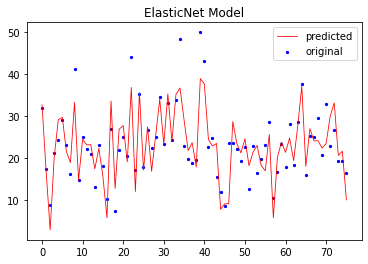

In [6]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.title('ElasticNet Model')
plt.show()